In [1]:
import numpy as np
from sympy import *
from matplotlib import pyplot as plt

In [2]:
def image(a1, a2, s):
    fig, ax = plt.subplots()
    ax.plot(a1, a2, '-', color = 'darkblue')
    ax.set_title(s)
    ax.grid()
    plt.show()

$$
y'' = \sqrt{\frac 1{x^2} + \frac e {\ln x}y^2 - e^{y'}y}\\
y(e) = e,\;\;\;y(e^2) = 2e^2
$$

#### Решение задачи Коши

In [3]:
e = np.exp(1)
L1, L2 = e, e**2
Y1, Y2 = e, 2*e**2

arr_y = []

global h
N = 1e+4
h = (L2 - L1) / N

def f(x, y, dy):
    return np.sqrt(1/x**2 + e/np.log(x) * (y**2) - np.exp(dy)*y)

def iteration(x, y, dy):
    y_next = y + h*dy
    dy_next = dy + h*f(x, y, dy)
    return (y_next, dy_next)

def shooting(alpha):
    global arr_y
    dy_0 = alpha

    x = L1
    y = Y1
    dy = dy_0
    arr_y = [y]
    while x < L2:
        y, dy = iteration(x, y, dy)
        arr_y.append(y)
        x += h
    return y

#### Метод Ньютона для нахождения оптимального пристрелочного параметра

In [5]:
h_ = 1e-3

def F (alpha):
    return shooting(alpha) - Y2

def dF(alpha):
    return (F(alpha + h_) - F(alpha)) / h_

def Newton():
    alpha_opt = 1
    for i in range(100):
        alpha_opt = alpha_opt - (F(alpha_opt) / dF(alpha_opt))
    return alpha_opt

alpha_opt = Newton()
print(alpha_opt)

2.005370766075815


#### Решение при оптимальном параметре

In [6]:
y = shooting(alpha_opt)

#### График

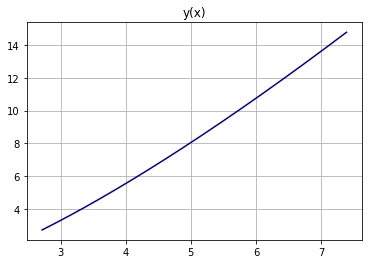

In [7]:
image(np.linspace(L1, L2, len(arr_y)), arr_y, 'y(x)')